In [1]:
!pip install plotly



In [146]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sbs
import plotly.graph_objects as go

In [147]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [148]:
file=pd.read_csv("Comilla.csv")
file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Comilla,1/1/13,23.2,9.7,15.9,23.2,9.7,15.9,10.7,72.9,...,15.3,7,NaN,2013-01-01T06:37:15,2013-01-01T17:20:24,0.63,Clear,Clear conditions throughout the day.,clear-day,"42724099999,41953099999,41933099999,4194309999..."
1,Comilla,2/1/13,26.1,10.5,17.0,26.1,10.5,17.0,12.0,74.5,...,15.9,7,NaN,2013-01-02T06:37:32,2013-01-02T17:21:03,0.67,Clear,Clear conditions throughout the day.,clear-day,"42724099999,41953099999,41933099999,4194309999..."
2,Comilla,3/1/13,26.2,11.4,17.9,26.2,11.4,17.9,14.0,79.2,...,9.9,5,NaN,2013-01-03T06:37:48,2013-01-03T17:21:43,0.70,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"42724099999,41953099999,41943099999,4193309999..."
3,Comilla,4/1/13,25.7,12.4,18.3,25.7,12.4,18.3,14.7,81.3,...,14.7,7,NaN,2013-01-04T06:38:03,2013-01-04T17:22:23,0.74,Partially cloudy,Becoming cloudy in the afternoon.,partly-cloudy-day,"42724099999,41953099999,41933099999,4194309999..."
4,Comilla,5/1/13,24.7,10.8,16.4,24.7,10.8,16.4,11.1,74.0,...,15.1,7,NaN,2013-01-05T06:38:17,2013-01-05T17:23:03,0.75,Clear,Clear conditions throughout the day.,clear-day,"42724099999,41953099999,41933099999,4194309999..."


In [149]:
file.shape

(3945, 33)

In [150]:
file.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [151]:
file.isnull().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype          1728
snow                3296
snowdepth           3296
windgust            3196
windspeed              0
winddir                0
sealevelpressure       1
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          3296
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [152]:
file.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

<h3>Data CLeaning:</h3>

---

Filling Nan values with mean() and mode() such that mean() for "int" or "float" data type and mode() for "object" data type:

In [153]:
for column in file.columns:
    if any(file[column].isnull()):
        if file[column].dtype=='int' or file[column].dtype=='float':
                 file[column].fillna(file[column].mean(),inplace=True)
        elif file[column].dtype=='object':
                 file[column].fillna(file[column].mode().iloc[0],inplace=True)
file.isnull().sum()

name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
severerisk          0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
dtype: int64

---

Removing Duplicates:

There were many duplicates As before removing duplicates the rows were 4525 and after we have 4160 rows.

In [154]:
print(f"File size before removing Duplicates:{file.shape}")
file.drop_duplicates(inplace=True)
print(f"File size after removing Duplicates:{file.shape}")

File size before removing Duplicates:(3945, 33)
File size after removing Duplicates:(3945, 33)


Identifying and Removing Outliers:

---

For numerical columns like tempmax_x, tempmin_x, temp, feelslikemax, and others: Are there any outliers (box plot)?

Note: I am checking outliers for all numerical columns not going for specific:

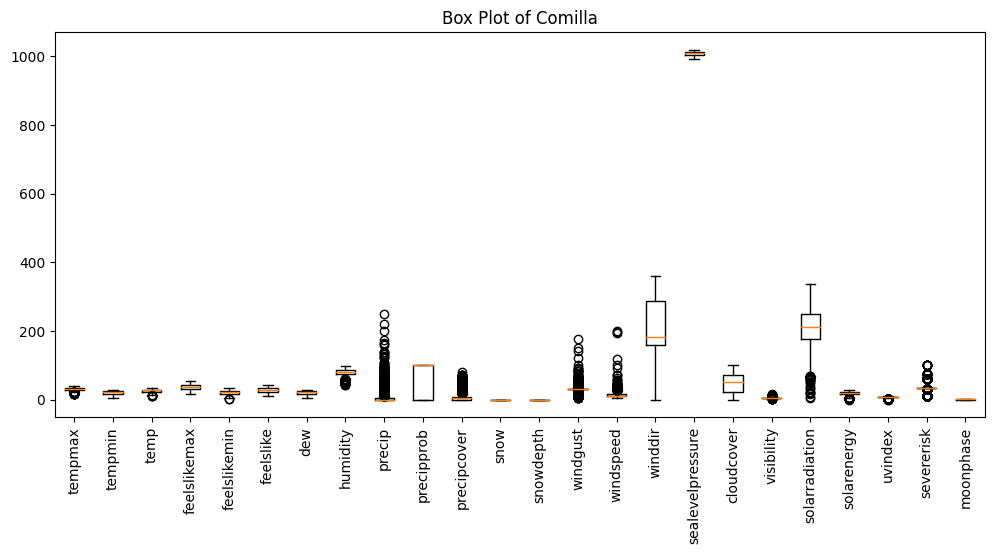

In [155]:
numeric_columns =file.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,5))
plt.boxplot(numeric_columns.values, labels=numeric_columns.columns)
plt.title("Box Plot of Comilla")
plt.xticks(rotation=90)
plt.show()

In [156]:
columns_having_outliers=['tempmax','temp','feelslikemin','humidity','precip','precipcover','windgust','windspeed',
                         'visibility','solarradiation','solarenergy','uvindex','severerisk']
def remove_outliers(data,columns_having_outliers, threshold=1.5):
    data_no_outliers = data.copy()
    for column in columns_having_outliers:
        if column in data.columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            data_no_outliers = data_no_outliers[(data_no_outliers[column] >= lower_bound) & (data_no_outliers[column] <= upper_bound)]
    return data_no_outliers
print(f"File size before removing outliers:{file.shape}")
print("-------------------------------------------------")
df=remove_outliers(file,columns_having_outliers)
print(f"File size before removing outliers:{df.shape}")

File size before removing outliers:(3945, 33)
-------------------------------------------------
File size before removing outliers:(2104, 33)


---

Covnerting "datetime" feature for further analysis:

<h3>Univariate Analysis:</h3>
Summary Statistics:

In [157]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,...,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2.104000e+03,2104.000000
mean,30.520580,19.404230,24.353517,34.795200,19.461644,26.406939,20.035266,78.995532,0.931939,36.787072,...,11.730276,216.954800,1010.136706,37.986027,3.950475,208.063118,17.962833,7.353137,3.258089e+01,0.483593
std,3.755999,5.690662,4.544621,7.659859,5.985764,6.724014,5.135044,7.360027,2.124048,48.234057,...,4.486711,106.091558,4.979843,27.253465,1.049946,44.083741,3.816743,1.309575,1.385888e-12,0.288685
min,21.500000,6.200000,13.100000,21.500000,3.600000,12.700000,7.500000,59.100000,0.000000,0.000000,...,3.600000,0.100000,994.300000,0.000000,1.000000,92.500000,8.100000,4.000000,3.258089e+01,0.000000
25%,27.700000,14.400000,20.400000,27.900000,14.400000,20.400000,15.600000,74.275000,0.000000,0.000000,...,8.600000,167.300000,1006.400000,14.300000,3.200000,178.000000,15.400000,7.000000,3.258089e+01,0.250000
50%,31.000000,20.000000,25.200000,34.100000,20.000000,26.100000,20.450000,80.000000,0.000000,0.000000,...,10.800000,200.250000,1011.300000,33.650000,4.000000,205.000000,17.700000,7.000000,3.258089e+01,0.500000
75%,33.525000,25.125000,28.500000,41.900000,25.125000,32.400000,25.300000,84.200000,0.500000,100.000000,...,13.300000,326.925000,1014.000000,62.100000,4.800000,240.525000,20.800000,8.000000,3.258089e+01,0.750000
max,39.700000,28.000000,32.700000,53.900000,33.200000,41.900000,27.800000,94.500000,11.000000,100.000000,...,27.400000,360.000000,1019.600000,94.800000,6.100000,323.500000,28.000000,10.000000,3.258089e+01,0.980000


<h3>Data Visualization:</h3>

---

Temperature Box Plot:

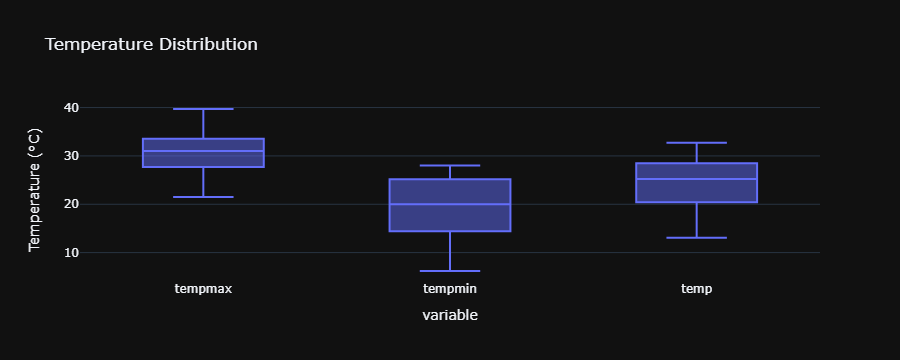

In [158]:
fig = px.box(df, y=['tempmax', 'tempmin', 'temp'], title='Temperature Distribution', template='plotly_dark')
fig.update_layout(yaxis_title='Temperature (°C)')
fig.write_html("Comilla Temperature Box Plot.html")
fig.show()

---

Solar Energy vs. Solar Radiation

Scatter Plot:

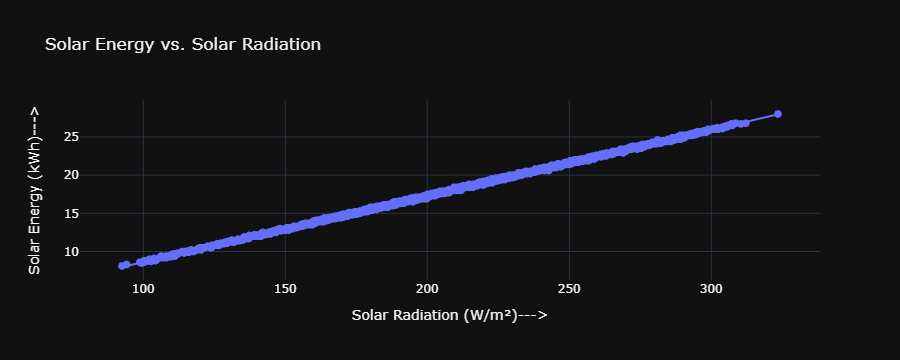

In [159]:
fig = px.scatter(df,x='solarradiation',y='solarenergy',title='Solar Energy vs. Solar Radiation',template='plotly_dark')
fig.update_traces(marker=dict(size=8))
fig.add_traces(px.scatter(df, x='solarradiation',y='solarenergy',trendline='ols').data)
fig.update_layout(xaxis_title='Solar Radiation (W/m²)--->',yaxis_title='Solar Energy (kWh)--->',showlegend=True)
fig.write_html("Comilla Solar Energy Vs Solar Radiation.html")
fig.show()

---

Weather Condition Counts:

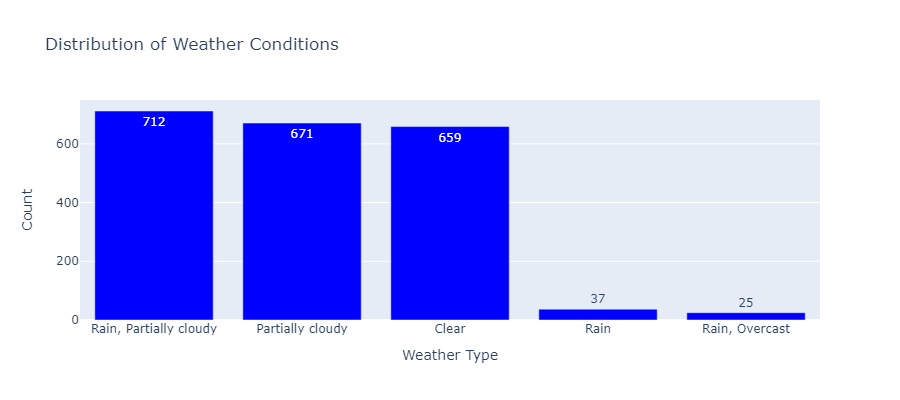

In [160]:
condition_counts = df['conditions'].value_counts().reset_index()
condition_counts.columns = ['Weather Condition', 'Count']
fig = px.bar(condition_counts,x='Weather Condition',y='Count',labels={'Weather Condition': 'Weather Condition', 'Count': 'Count'},
title='Distribution of Weather Conditions',text='Count',height=400,width=600,color_discrete_sequence=['blue'])
fig.update_layout(xaxis_title="Weather Type",yaxis_title='Count')
fig.write_html('Comilla_Weather_Condiditions_Distribution.html')
fig.show()

---

Pie Chart of Comilla Common Weather Conditions In Percentage:
    
---

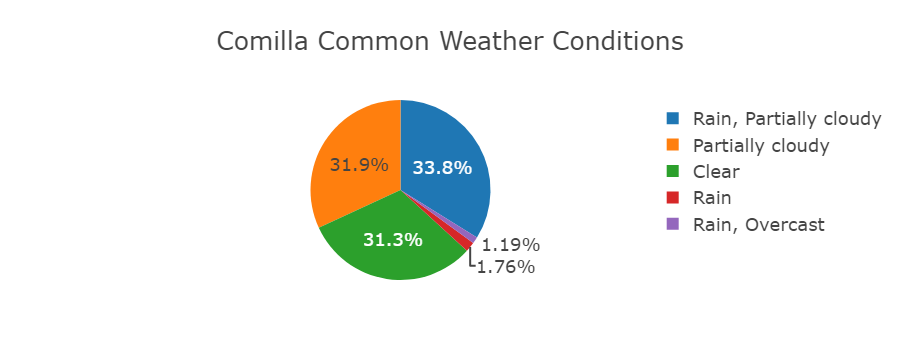

In [174]:
weather_conditions = df['conditions'].value_counts().reset_index()
weather_conditions.columns = ['Condition', 'Count']
weather_conditions = weather_conditions.sort_values(by='Count', ascending=False)
fig = px.pie(weather_conditions, names='Condition',values='Count',title='Comilla Common Weather Conditions',template='presentation')
fig.show()

---

Wind Rose Chart:

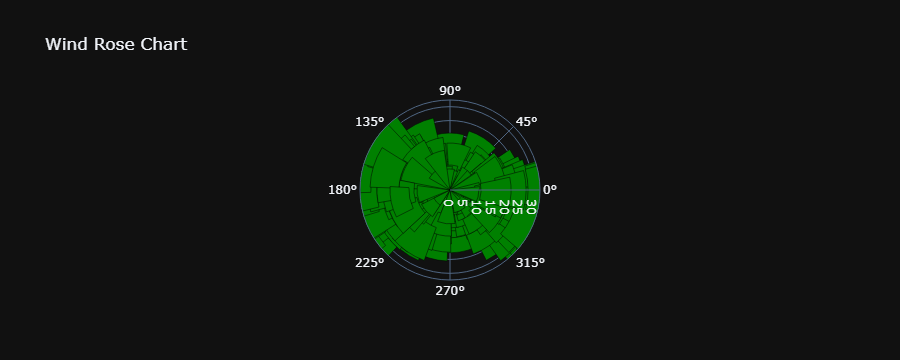

In [161]:
fig = go.Figure()
wind_speed=df.windspeed
wind_direction=df.winddir
fig.add_trace(go.Barpolar(r=wind_speed,theta=wind_direction,marker_color='green',marker_line_color='black',name='Wind Speed',width=30,))
fig.update_layout(title='Wind Rose Chart',polar=dict(radialaxis=dict(visible=True,range=[0, max(wind_speed)+5],),),template='plotly_dark',)
fig.write_html("Comilla_Wind_Rose_Chart.html")
fig.show()

---

Precipication Histogram:

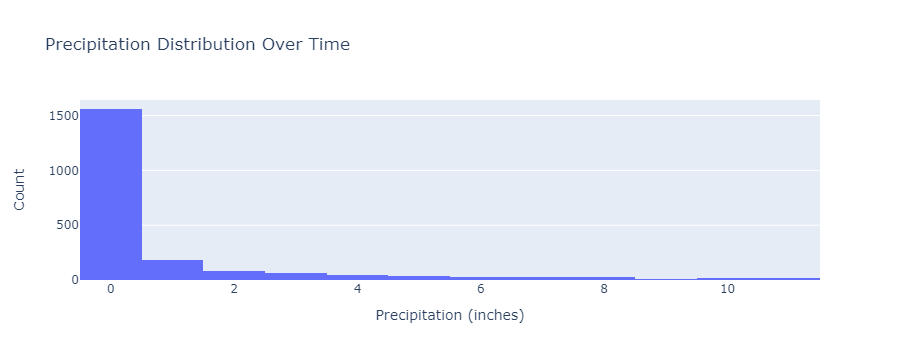

In [162]:
fig=px.histogram(x=df.precip,nbins=20,labels={'x':'Precipitation (inches)'},title='Precipitation Distribution Over Time',)
fig.update_layout(xaxis_title='Precipitation (inches)',yaxis_title='Count')
fig.write_html("Comilla_Precipitation Distribution Over Time.html")
fig.show()

---

UV Index Distribution with High UV Risk Threshold:

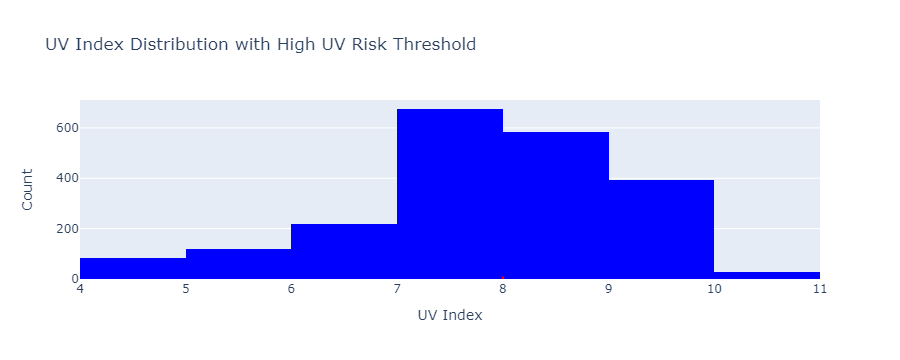

In [163]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['uvindex'],name='UV Index',xbins=dict(start=0,end=15,size=1,),marker_color='blue',))
fig.add_shape(go.layout.Shape(type='line',x0=8,x1=8,y0=0,y1=10,line=dict(color='red', width=2, dash='dash'),name='High UV Risk Threshold'))
fig.update_layout(title='UV Index Distribution with High UV Risk Threshold',xaxis_title='UV Index',yaxis_title='Count',)
fig.show()
fig.write_html("Comilla_UV_Index_Distribution.html")

<h2>Time Series Analysis:</h2>
Line Plots:

---

How UV-Index changes over the time/year?

---

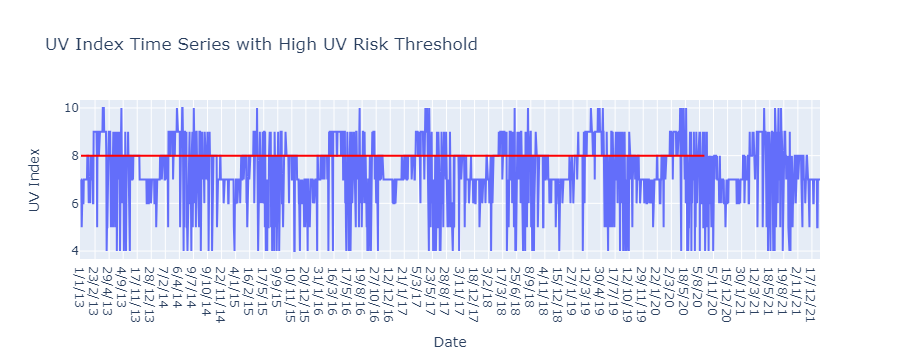

In [164]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['datetime'], y=df['uvindex'], mode='lines', name='UV Index'))
fig.add_shape(go.layout.Shape(type='line',
    x0=df['datetime'].min(),x1=df['datetime'].max(),
    y0=8,y1=8,line=dict(color='red',width=2),
    name='High UV Risk Threshold'))
fig.update_layout(title='UV Index Time Series with High UV Risk Threshold',xaxis_title='Date', yaxis_title='UV Index')
fig.write_html("Comilla_UV_Index_Time_Series_with_High_UV_Risk.html")
fig.show()

---

How Feelslike number changes over the time/year?

---

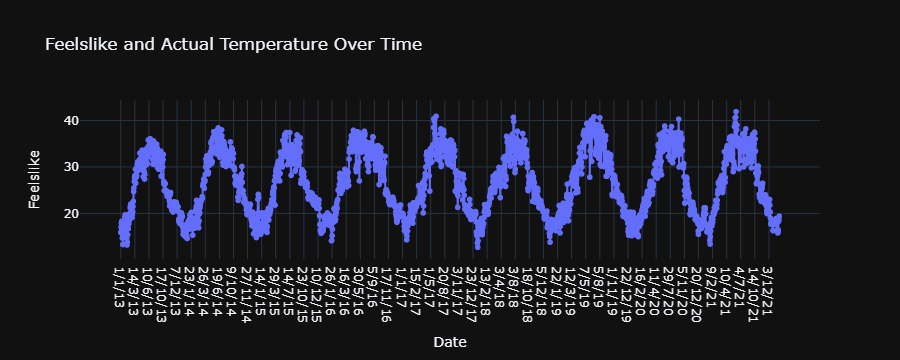

In [165]:
fig = px.line(df, x='datetime', y='feelslike', title='Feelslike and Actual Temperature Over Time',template='plotly_dark',text='temp')
fig.update_layout(xaxis_title='Date',yaxis_title='Feelslike')
#fig.write_html("Comilla_Feelslike_and_Actual_Temperature_Over_Time.html")
fig.show()

---

How Dew changes with Time/Year?

---

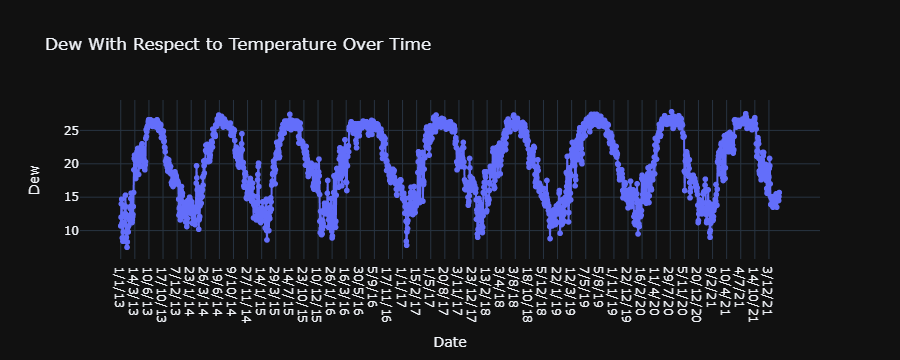

In [167]:
fig=px.line(df,x='datetime',y='dew',title='Dew With Respect to Temperature Over Time',template='plotly_dark',text='temp')
fig.update_layout(xaxis_title='Date', yaxis_title='Dew')
fig.show()

<h2>Correlation Analysis:</h2>

---

To avoid messy heatmap. I am doing column slicing for every 6 columns that's why we have 4 heatmaps. 6X4=24

24 columns data types=int,float

In [170]:
numerical_dt_columns =df.select_dtypes(include=['int','float']).columns#only selecting the features having numerical values.
numerical_dt_columns

Index(['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'severerisk', 'moonphase'],
      dtype='object')

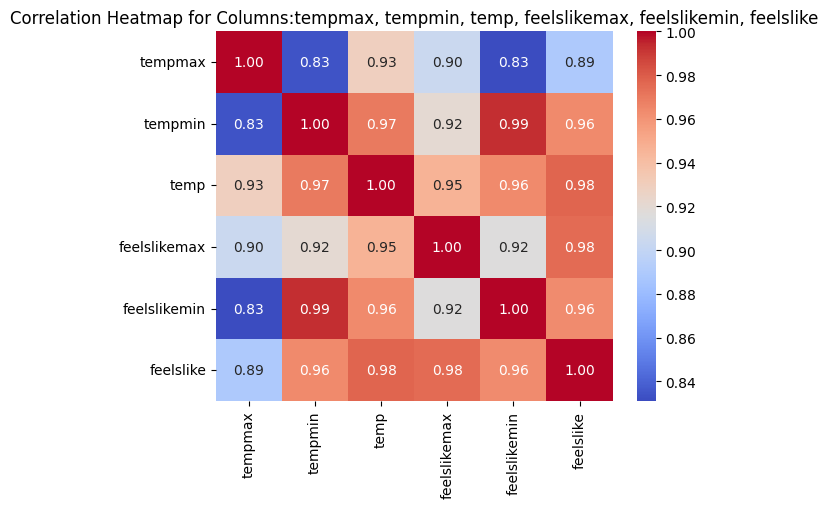

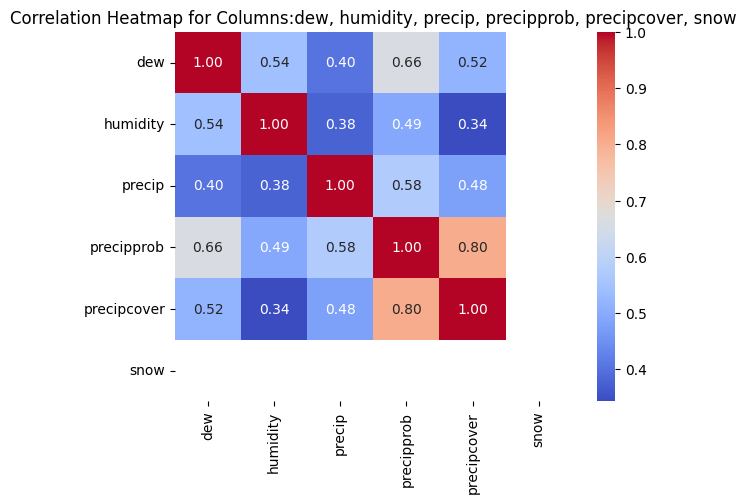

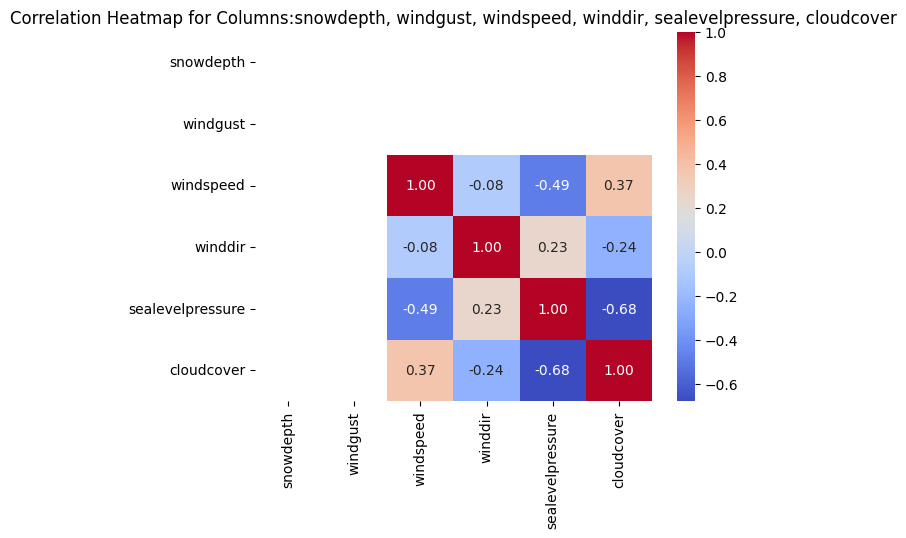

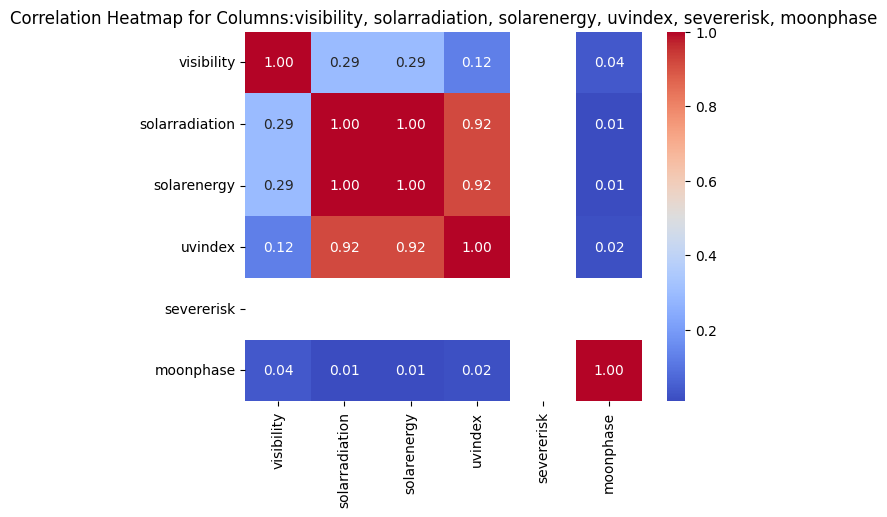

In [172]:
for i in range(0,len(numerical_dt_columns),6):
    subset_columns=numerical_dt_columns[i:i+6]
    subset_df=df[subset_columns]
    correlation_matrix= subset_df.corr()
    sbs.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
    plt.title(f'Correlation Heatmap for Columns:{", ".join(subset_columns)}')
    plt.show()

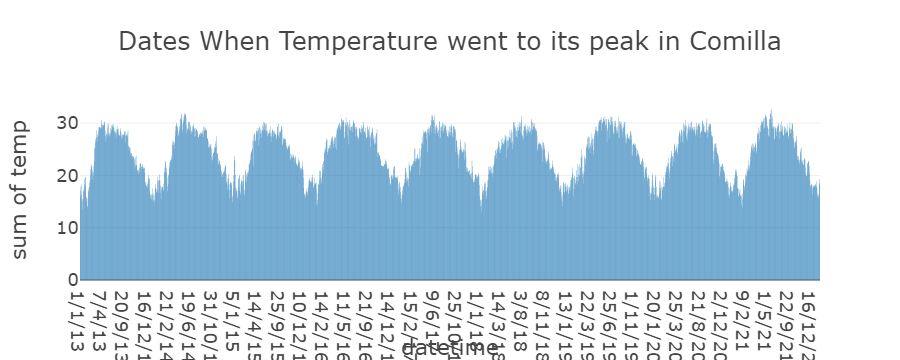

In [178]:
fig=px.histogram(df,x='datetime',y='temp',title='Dates When Temperature went to its peak in Comilla',template='presentation')
fig.show()